In [19]:
pip install yfinance


[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [57]:
start = '2012-01-01'
end = '2024-1-16'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [58]:
data.reset_index(inplace=True)

In [59]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
3022,2024-01-08,138.000000,140.639999,137.880005,140.529999,140.529999,17645300
3023,2024-01-09,140.059998,142.800003,139.789993,142.559998,142.559998,19579700
3024,2024-01-10,142.520004,144.524994,142.460007,143.800003,143.800003,16641900
3025,2024-01-11,144.895004,146.660004,142.214996,143.669998,143.669998,17471100


In [60]:
ma_100_days = data.Close.rolling(100).mean()

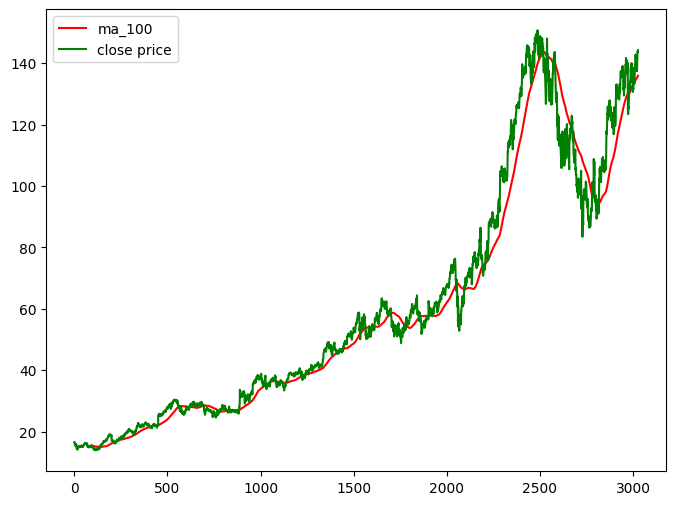

In [61]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r',label='ma_100')
plt.plot(data.Close, 'g',label='close price')
plt.legend()
plt.show()

In [62]:
ma_200_days = data.Close.rolling(200).mean()

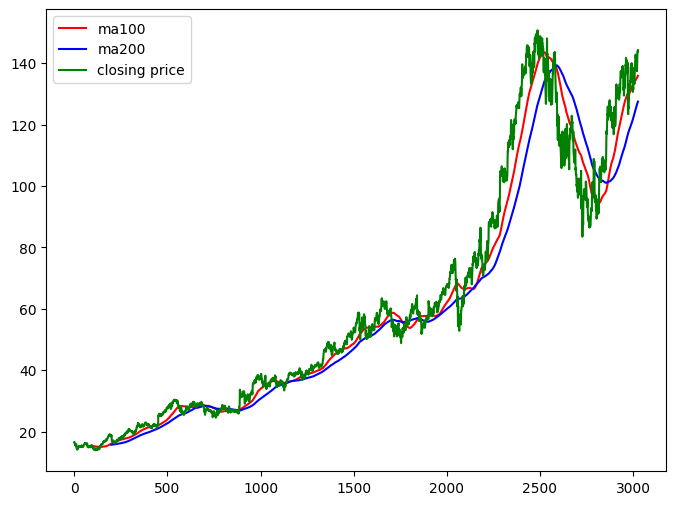

In [63]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r',label='ma100')
plt.plot(ma_200_days,'b',label='ma200')
plt.plot(data.Close,'g',label='closing price')
plt.legend()
plt.show()

In [64]:
data.dropna(inplace=True)

In [65]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [66]:
data_train.shape[0]

2421

In [67]:
data_test.shape[0]

606

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [69]:
data_train_scale = scaler.fit_transform(data_train)

In [70]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [71]:
x, y = np.array(x), np.array(y)

In [72]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [73]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [74]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [75]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
73/73 [==============================] - 18s 161ms/step - loss: 0.0203
Epoch 2/50
73/73 [==============================] - 11s 154ms/step - loss: 0.0044
Epoch 3/50
73/73 [==============================] - 11s 149ms/step - loss: 0.0033
Epoch 4/50
73/73 [==============================] - 12s 159ms/step - loss: 0.0035
Epoch 5/50
73/73 [==============================] - 12s 168ms/step - loss: 0.0030
Epoch 6/50
73/73 [==============================] - 16s 215ms/step - loss: 0.0029
Epoch 7/50
73/73 [==============================] - 19s 255ms/step - loss: 0.0028
Epoch 8/50
73/73 [==============================] - 12s 169ms/step - loss: 0.0030
Epoch 9/50
73/73 [==============================] - 12s 165ms/step - loss: 0.0027
Epoch 10/50
73/73 [==============================] - 13s 175ms/step - loss: 0.0027
Epoch 11/50
73/73 [==============================] - 14s 191ms/step - loss: 0.0024
Epoch 12/50
73/73 [==============================] - 15s 210ms/step - loss: 0.0025
Epoch 13/50
7

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [77]:
pas_100_days = data_train.tail(100)

In [78]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [79]:
data_test_scale  =  scaler.fit_transform(data_test)

In [80]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [81]:
y_predict = model.predict(x)

19/19 [==============================] - 2s 67ms/step


In [82]:
scale =1/scaler.scale_

In [83]:
y_predict = y_predict*scale

In [84]:
y = y*scale

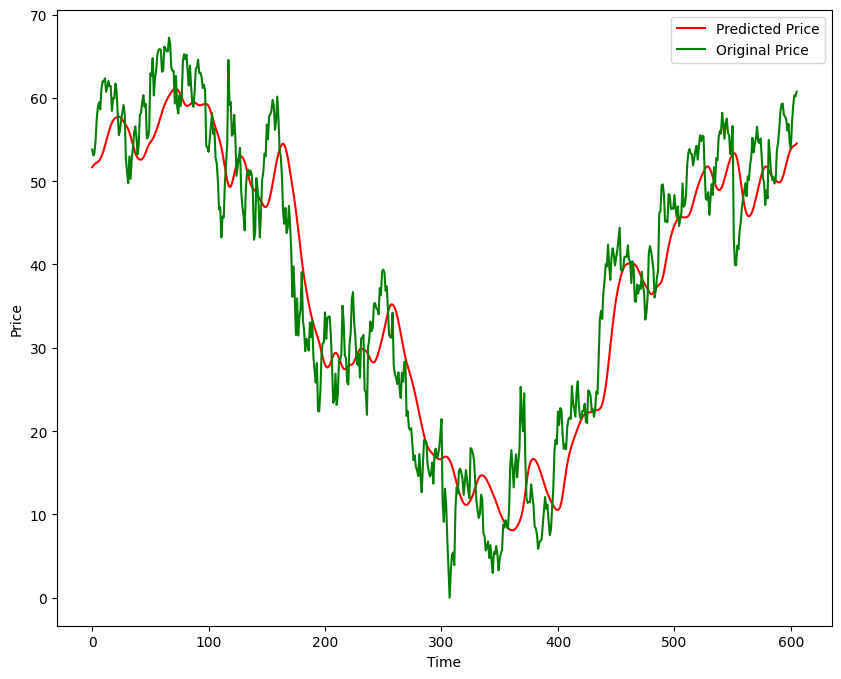

In [85]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [86]:
model.save('Stock Predictions Model.keras')